# Lesson 15-16: NumPy 資料分析 

## 學習目標
- 理解 NumPy 的核心資料結構：ndarray
- 掌握資料建立、切片、遮罩等基本操作
- 學會向量化運算（vectorization）與廣播（broadcasting）
- 應用 NumPy 進行統計分析、排序、分箱
- 完成一個小型資料分析專題

## 先修知識
- Pandas 基礎（DataFrame、資料清理）
- Matplotlib 基本繪圖
- Python 基礎語法

## 環境設定

In [102]:
# 匯入必要套件
import numpy as np
import matplotlib.pyplot as plt

# 設定 NumPy 輸出格式（不使用科學記號，保留 4 位小數）
np.set_printoptions(suppress=True, precision=4)

print("環境設定完成！")
print(f"NumPy 版本：{np.__version__}")

環境設定完成！
NumPy 版本：2.0.2


## 第 1 頁｜課程開場：你已經會 Pandas，為什麼還要學 NumPy？

### 重點說明
- **Pandas 底層其實就是 NumPy**：DataFrame 的每一欄本質上就是 NumPy 陣列
- **NumPy = 資料在「記憶體裡怎麼放、怎麼算最快」**：理解底層運作原理
- 今天學會用向量化思考問題，而不是迴圈 


## 第 2 頁｜今天你會學到什麼？

### 課程大綱
1. **NumPy 的核心資料結構**：ndarray（多維陣列）
2. **快速建立資料**：zeros、ones、arange、linspace、random
3. **切資料**：索引、切片、布林遮罩
4. **向量化運算**：不用 for-loop 的高效運算
5. **統計分析**：mean、sum、std、排序、分箱
6. **實戰專題**：用 NumPy 做一個小型資料分析任務

## 第 3 頁｜NumPy 的核心角色：ndarray 是什麼？

### 重點說明
- **ndarray = 一塊連續的記憶體**：所有資料緊密排列，存取速度快
- **每個元素型別一致**：不像 Python list 可以混合型別
- **比 Python list 快非常多**：通常快 10-100 倍以上

### 為什麼快？
- 連續記憶體配置
- 底層用 C 語言實作
- 向量化運算（一次處理整個陣列）

## 第 4 頁｜第一個 ndarray（一步一步）

In [153]:
# 步驟 1：從 Python list 建立 ndarray
a = np.array([10, 20, 30])

# 步驟 2：印出內容
print("陣列內容：", a)

# 步驟 3：確認型別
print("資料型別：", type(a))

# 講解：np.array() 把 Python list 轉成 NumPy ndarray
# 之後所有 NumPy 操作都圍繞 ndarray 進行

陣列內容： [10 20 30]
資料型別： <class 'numpy.ndarray'>


## 第 5 頁｜ndarray 的三個基本屬性

### 重點說明
- **ndim**：幾維資料（1D、2D、3D...）
- **shape**：每一維有幾個元素（像是 (3,) 或 (2, 3)）
- **dtype**：資料型別，決定運算速度與精度

In [154]:
# 使用前面建立的陣列 a
print("維度數量（ndim）：", a.ndim)  # 1 表示一維
print("形狀（shape）：", a.shape)    # (3,) 表示有 3 個元素
print("資料型別（dtype）：", a.dtype) # int64 或 int32（依系統而定）

# 重點：這三個屬性是理解 ndarray 的關鍵

維度數量（ndim）： 1
形狀（shape）： (3,)
資料型別（dtype）： int64


## 第 6 頁｜二維 ndarray（像表格）

### 重點說明
- **2 列 3 欄 → shape = (2, 3)**
- **非常像 DataFrame，但更底層**：沒有欄位名稱，只有位置索引
- 第一個維度是「列」，第二個維度是「欄」

In [155]:
# 建立二維陣列（可以想像成兩位學生的三科成績）
b = np.array([[70, 80, 90],   # 第一位學生
              [60, 75, 85]])  # 第二位學生

print("二維陣列：")
print(b)
print("\n形狀：", b.shape)  # (2, 3) 表示 2 列 3 欄
print("維度數量：", b.ndim) # 2 表示二維

二維陣列：
[[70 80 90]
 [60 75 85]]

形狀： (2, 3)
維度數量： 2


## 第 7 頁｜dtype 的重要性（新手最常踩雷）

### 重點說明
- **NumPy 會「自動升級型別」**：混合整數和浮點數會變成浮點數
- **混合型別 → 影響精度、效能**：型別不一致可能導致意外結果
- 建議：建立陣列時就明確指定 dtype

In [ ]:
# 混合整數和小數
c = np.array([1, 2, 3.5])


print("陣列內容：", c)
print("資料型別：", c.dtype)  # float64（因為有小數）

# 注意：原本的 1, 2 也變成 1., 2. 了
# 這就是「自動升級型別」

# 型別轉換：使用 astype()
c_int = c.astype(int)
print("\n轉換成整數：", c_int)
print("轉換後型別：", c_int.dtype)
print("注意：小數部分會被捨去（不是四捨五入）")

original float64
陣列內容： [1.  2.  3.5]
資料型別： float64

轉換成整數： [1 2 3]
轉換後型別： int64
注意：小數部分會被捨去（不是四捨五入）


## 第 8 頁｜小試身手 1

### 練習任務
1. 建立一個含整數與小數的 ndarray
2. 印出 shape、dtype
3. 用 `astype(int)` 轉型，觀察差異


In [158]:
# 參考解法（請學員先自行嘗試）

# 1. 建立混合型別的陣列
data = np.array([10, 20.5, 30, 40.8, 50])
print("原始陣列：", data)
print("Shape：", data.shape)
print("Dtype：", data.dtype)

# 2. 轉換為整數型別
data_int = data.astype(int)
print("\n轉換後：", data_int)
print("Dtype：", data_int.dtype)
print("觀察：小數部分被捨去了！")


原始陣列： [10.  20.5 30.  40.8 50. ]
Shape： (5,)
Dtype： float64

轉換後： [10 20 30 40 50]
Dtype： int64
觀察：小數部分被捨去了！


## 第 9 頁｜快速建立資料：不用一個一個打

### 重點說明
- **zeros**：建立全 0 陣列
- **ones**：建立全 1 陣列
- **full**：建立指定數值的陣列
- **常用來建立初始資料或模板**：例如初始化權重、建立遮罩等

In [159]:
# 建立 3x4 的全 0 陣列
zeros_array = np.zeros((3, 4))
print("全 0 陣列 (3x4)：")
print(zeros_array)

# 建立 2x3 的全 1 陣列
ones_array = np.ones((2, 3))
print("\n全 1 陣列 (2x3)：")
print(ones_array)

# 建立 2x2 的陣列，全部填入 99
full_array = np.full((2, 2), 99)
print("\n全 99 陣列 (2x2)：")
print(full_array)

全 0 陣列 (3x4)：
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

全 1 陣列 (2x3)：
[[1. 1. 1.]
 [1. 1. 1.]]

全 99 陣列 (2x2)：
[[99 99]
 [99 99]]


## 第 10 頁｜連續數字資料：arange vs linspace

### 重點說明
- **arange**：間距固定（類似 Python 的 range）
- **linspace**：平均切區間（分析很常用，例如切時間軸）
- 選擇原則：知道間距用 arange，知道要幾個點用 linspace

In [160]:
# arange：從 0 到 10（不含），間距 2
arange_data = np.arange(0, 10, 2)
print("arange(0, 10, 2)：", arange_data)

# linspace：從 0 到 1，平均分成 5 個點
linspace_data = np.linspace(0, 1, 5)
print("linspace(0, 1, 5)：", linspace_data)

# 比較：arange 的終點不包含，linspace 的終點包含

arange(0, 10, 2)： [0 2 4 6 8]
linspace(0, 1, 5)： [0.   0.25 0.5  0.75 1.  ]


## 第 11 頁｜隨機資料（模擬真實世界）

### 重點說明
- **seed 讓結果可重現**：相同 seed 產生相同隨機數
- **模擬月營收**：用隨機數產生 12 個月的銷售數據
- 實務應用：測試演算法、產生假資料、蒙地卡羅模擬

In [167]:
# 設定隨機種子（讓每次執行結果相同）
np.random.seed(42)

# 產生 12 個月的隨機營收（50,000 到 200,000 之間）
sales = np.random.randint(50000, 200000, size=12)

print("12 個月營收（模擬）：")
print(sales)
print("\n資料型別：", sales.dtype)
print("資料形狀：", sales.shape)

12 個月營收（模擬）：
[171958 196867 181932 153694 169879 160268 104886 187337 137498 162727
 176324  66023]

資料型別： int64
資料形狀： (12,)


## 第 12 頁｜小試身手 2

### 練習任務
使用上面的 `sales` 陣列，計算：
1. 平均營收
2. 最大營收
3. 最小營收
4. 總營收


- 平均：`np.mean()` 或 `array.mean()`
- 最大/最小：`np.max()`、`np.min()` 或 `.max()`、`.min()`
- 總和：`np.sum()` 或 `.sum()`
- 注意：NumPy 函數和方法兩種寫法都可以

In [8]:
## 如果要用Pandas 找出這些數值要怎麼做？
# 建立 DataFrame（含月份）
import pandas as pd
sales = [100, 120, 150, 130, 140, 160, 180, 200, 190, 210, 230, 250]

df = pd.DataFrame({
    '月份': range(1, 13),
    '營收': sales
    })
print("12 個月營收（模擬）：")
print(sales)


12 個月營收（模擬）：
[100, 120, 150, 130, 140, 160, 180, 200, 190, 210, 230, 250]


'\nprint("平均營收：", sales.mean())\nprint("最大營收：", sales.max())\nprint("最小營收：", sales.min())\nprint("總營收：", sales.sum())\n\n# 或者用 NumPy 函數\nprint("\n使用 np 函數：")\nprint("平均營收：", np.mean(sales))\nprint("最大營收：", np.max(sales))\n'

## 第 13 頁｜索引：從 ndarray 拿資料

### 重點說明
- 索引從 0 開始
- 負數索引從後面算起（-1 是最後一個）
- 跟 Python list 用法相同

In [112]:
# 建立一維陣列
a = np.array([10, 20, 30, 40, 50])
print("原始陣列：", a)

# 取第一個元素
print("第一個元素 a[0]：", a[0])

# 取最後一個元素
print("最後一個元素 a[-1]：", a[-1])

# 取倒數第二個
print("倒數第二個 a[-2]：", a[-2])

原始陣列： [10 20 30 40 50]
第一個元素 a[0]： 10
最後一個元素 a[-1]： 50
倒數第二個 a[-2]： 40


## 第 14 頁｜切片（slice）

### 重點說明
- **語法**：`[start:stop:step]`
- **跟 Python list 很像**：但效能好很多
- stop 不包含、省略 start 從頭開始、省略 stop 到結尾

In [113]:
# 切片範例
print("原始陣列 a：", a)

# 取索引 1 到 3（不含 4）
print("a[1:4]：", a[1:4])  # [20, 30, 40]

# 取前三個
print("a[:3]：", a[:3])    # [10, 20, 30]

# 每隔一個取一個
print("a[::2]：", a[::2])  # [10, 30, 50]

# 倒序
print("a[::-1]：", a[::-1]) # [50, 40, 30, 20, 10]

原始陣列 a： [10 20 30 40 50]
a[1:4]： [20 30 40]
a[:3]： [10 20 30]
a[::2]： [10 30 50]
a[::-1]： [50 40 30 20 10]


## 第 15 頁｜二維索引（列、欄）

### 重點說明
- **語法**：`[列索引, 欄索引]`
- **`:`** 表示「全部」
- 可以同時切列和欄

In [114]:
# 回顧二維陣列 b
print("二維陣列 b：")
print(b)

# 取第 0 列（第一位學生的所有成績）
print("\n第 0 列 b[0,:]：", b[0, :])  # [70, 80, 90]

# 取第 1 欄（所有學生的第二科成績）
print("第 1 欄 b[:,1]：", b[:, 1])    # [80, 75]

# 取前兩列、第 1-2 欄
print("b[0:2, 1:3]：")
print(b[0:2, 1:3])  # [[80, 90], [75, 85]]

二維陣列 b：
[[70 80 90]
 [60 75 85]]

第 0 列 b[0,:]： [70 80 90]
第 1 欄 b[:,1]： [80 75]
b[0:2, 1:3]：
[[80 90]
 [75 85]]


## 第 16 頁｜布林遮罩（分析最重要）

### 重點說明
- **遮罩**：用 True/False 陣列篩選資料
- **資料分析最常用**：找出符合條件的資料
- 步驟：建立條件 → 產生遮罩 → 用遮罩篩選

In [115]:
# 建立成績陣列
scores = np.array([55, 70, 85, 40])
print("原始成績：", scores)

# 步驟 1：建立條件（成績 >= 60）
mask = scores >= 60
print("\n遮罩（True/False）：", mask)  # [False, True, True, False]

# 步驟 2：用遮罩篩選資料
passed_scores = scores[mask]
print("及格成績：", passed_scores)  # [70, 85]

# 或者一行寫完
print("及格成績（簡寫）：", scores[scores >= 60])

原始成績： [55 70 85 40]

遮罩（True/False）： [False  True  True False]
及格成績： [70 85]
及格成績（簡寫）： [70 85]


## 第 17 頁｜多條件篩選

### 重點說明
- **且**：用 `&`（不是 `and`！）
- **或**：用 `|`（不是 `or`！）
- **非**：用 `~`（不是 `not`！）
- **重要**：每個條件要用括號包起來

In [168]:
# 多條件範例：60 <= 成績 < 80
mask_range = (scores >= 60) & (scores < 80)
print("原始成績：", scores)
print("60-79 分的遮罩：", mask_range)
print("60-79 分的成績：", scores[mask_range])

# 或條件：< 60 或 >= 85
mask_or = (scores < 60) | (scores >= 85)
print("\n不及格或優秀：", scores[mask_or])

原始成績： [55 70 85 40]
60-79 分的遮罩： [False  True False False]
60-79 分的成績： [70]

不及格或優秀： [55 85 40]


## 第 18 頁｜小試身手 3

### 練習任務
1. 找出高於平均的數值
2. 找出最大值的位置（索引）



In [ ]:
# 參考解法
# 1. 找出高於平均的數值
avg = 
print("平均成績：", avg)
above_avg = scores[scores > avg]
print("高於平均的成績：", above_avg)

# 2. 找出最大值的位置
max_idx 
print("\n最大值索引：", max_idx)
print("最大值：", scores[max_idx])


平均成績： 62.5
高於平均的成績： [70 85]

最大值索引： 2
最大值： 85


## 第 19 頁｜向量化運算：為什麼 NumPy 快？

### 重點說明
- **一次對整個陣列運算**：不需要 for-loop
- **底層用 C 實作**：速度快非常多
- **思維轉變**：從「逐個處理」變成「整體處理」

In [118]:
# 向量化運算範例
print("原始成績：", scores)

# 所有人加 5 分（向量化）
scores_plus5 = scores + 5
print("加 5 分後：", scores_plus5)

# 所有人乘以 1.1（加權 10%）
scores_boosted = scores * 1.1
print("加權 10%：", scores_boosted)

# 陣列間運算
weights = np.array([0.9, 1.0, 1.1, 0.95])
adjusted = scores * weights
print("個別調整：", adjusted)

# 重點：不需要寫 for i in range(len(scores))

原始成績： [55 70 85 40]
加 5 分後： [60 75 90 45]
加權 10%： [60.5 77.  93.5 44. ]
個別調整： [49.5 70.  93.5 38. ]


## 第 20 頁｜條件運算：where

### 重點說明
- **語法**：`np.where(條件, True時的值, False時的值)`
- **類似 Excel 的 IF 函數**
- 可以用來標記、分類、替換數值

In [119]:
# 判斷及格/不及格
result = np.where(scores >= 60, "Pass", "Fail")
print("成績：", scores)
print("結果：", result)

# 也可以用數值
capped = np.where(scores > 80, 80, scores)  # 超過 80 的都改成 80
print("\n成績上限 80：", capped)

# 多層條件：可以巢狀使用
grade = np.where(scores >= 80, "A", 
                 np.where(scores >= 60, "B", "C"))
print("等第：", grade)

成績： [55 70 85 40]
結果： ['Fail' 'Pass' 'Pass' 'Fail']

成績上限 80： [55 70 80 40]
等第： ['C' 'B' 'A' 'C']


## 第 21 頁｜broadcasting（基礎版本）

### 重點說明
- **broadcasting = 自動擴展維度**：讓不同形狀的陣列可以運算
- **規則**：較小的陣列會「廣播」到較大的陣列
- **應用**：權重計算、標準化、批次處理

In [120]:
# 建立學生成績（2 位學生 x 3 科）
scores_2d = np.array([[70, 80, 90],
                      [60, 75, 85]])
print("成績陣列 shape：", scores_2d.shape)  # (2, 3)

# 建立權重（3 科）
weights = np.array([0.3, 0.3, 0.4])
print("權重陣列 shape：", weights.shape)    # (3,)

# 相乘（broadcasting 自動擴展）
weighted = scores_2d * weights
print("\n加權後：")
print(weighted)
print("shape：", weighted.shape)  # (2, 3)

# 解釋：weights 被自動「廣播」成 (2, 3)，然後逐元素相乘

成績陣列 shape： (2, 3)
權重陣列 shape： (3,)

加權後：
[[21.  24.  36. ]
 [18.  22.5 34. ]]
shape： (2, 3)


## 第 22 頁｜加權總分（一步完成）

### 重點說明
- **axis=1**：沿著欄的方向加總（每列各自加總）
- **結合 broadcasting 和 aggregation**
- 一行程式完成複雜計算

In [121]:
# 計算每位學生的加權總分
final_scores = (scores_2d * weights).sum(axis=1)
print("原始成績：")
print(scores_2d)
print("\n權重：", weights)
print("\n加權總分：", final_scores)

# 拆解步驟理解：
# 1. scores_2d * weights → 每個成績乘以對應權重
# 2. .sum(axis=1) → 每列（每位學生）的加權成績加總

原始成績：
[[70 80 90]
 [60 75 85]]

權重： [0.3 0.3 0.4]

加權總分： [81.  74.5]


## 第 23 頁｜小試身手 4

### 練習任務
1. 算出每位學生的加權總分（使用上面的 scores_2d 和 weights）
2. 找出最高分學生的索引

### 解題提示（老師用）
- 加權總分：`(scores_2d * weights).sum(axis=1)`
- 最高分索引：`np.argmax(final_scores)`
- 驗證：印出該學生的原始成績和加權總分

In [171]:
# 參考解法

# 1. 計算加權總分
final_scores = (scores_2d * weights).sum(axis=1)
print("加權總分：", final_scores)

# 2. 找出最高分學生
best_student = np.argmax(final_scores)
print("\n最高分學生索引：", best_student)
print("該學生原始成績：", scores_2d[best_student])
print("該學生加權總分：", final_scores[best_student])


加權總分： [81.  74.5]

最高分學生索引： 0
該學生原始成績： [70 80 90]
該學生加權總分： 81.0


## 第 24 頁｜統計分析：mean / sum / std

### 重點說明
- **axis=0**：沿著列的方向（計算每欄）
- **axis=1**：沿著欄的方向（計算每列）
- **axis=None**：計算全部（預設值）

In [123]:
print("成績陣列：")
print(scores_2d)

# 每科的平均（axis=0，直的算）
subject_avg = scores_2d.mean(axis=0)
print("\n每科平均（axis=0）：", subject_avg)

# 每位學生的平均（axis=1，橫的算）
student_avg = scores_2d.mean(axis=1)
print("每位學生平均（axis=1）：", student_avg)

# 全部的平均
overall_avg = scores_2d.mean()
print("全部平均：", overall_avg)

成績陣列：
[[70 80 90]
 [60 75 85]]

每科平均（axis=0）： [65.  77.5 87.5]
每位學生平均（axis=1）： [80.     73.3333]
全部平均： 76.66666666666667


## 第 25 頁｜axis 超重要（白話版）

### 重點說明
- **axis=0**：「直的算」，結果會「壓扁列」，留下欄
- **axis=1**：「橫的算」，結果會「壓扁欄」，留下列
- **記憶法**：axis 是「要消失的維度」

In [124]:
# 建立範例陣列
arr = np.array([[1, 2, 3],
                [4, 5, 6]])
print("原始陣列 (2x3)：")
print(arr)

# axis=0：直的算（列消失，留下欄）
print("\naxis=0 加總（直的）：", arr.sum(axis=0))  # [5, 7, 9]
print("結果 shape：", arr.sum(axis=0).shape)      # (3,)

# axis=1：橫的算（欄消失，留下列）
print("\naxis=1 加總（橫的）：", arr.sum(axis=1))  # [6, 15]
print("結果 shape：", arr.sum(axis=1).shape)      # (2,)

# 視覺化理解
print("\n\n視覺化：")
print("axis=0 → ↓ 這樣算（欄內加總）")
print("axis=1 → → 這樣算（列內加總）")

原始陣列 (2x3)：
[[1 2 3]
 [4 5 6]]

axis=0 加總（直的）： [5 7 9]
結果 shape： (3,)

axis=1 加總（橫的）： [ 6 15]
結果 shape： (2,)


視覺化：
axis=0 → ↓ 這樣算（欄內加總）
axis=1 → → 這樣算（列內加總）


## 第 26 頁｜NaN 的處理

### 重點說明
- **NaN = Not a Number**：缺失值的表示
- **mean() 遇到 NaN 會回傳 NaN**：這是陷阱！
- **nanmean() 會忽略 NaN**：專門處理缺失值的函數
- **isnan() 檢查是否為 NaN**

In [125]:
# 建立含 NaN 的陣列
arr_nan = np.array([1.0, np.nan, 3.0, 5.0])
print("含 NaN 的陣列：", arr_nan)

# 一般 mean 會失敗
print("\nnp.mean()：", np.mean(arr_nan))  # 回傳 nan

# nanmean 會忽略 NaN
print("np.nanmean()：", np.nanmean(arr_nan))  # (1+3+5)/3 = 3.0

# 檢查 NaN 位置
print("\n是否為 NaN：", np.isnan(arr_nan))

# 統計有幾個 NaN
print("NaN 數量：", np.isnan(arr_nan).sum())

含 NaN 的陣列： [ 1. nan  3.  5.]

np.mean()： nan
np.nanmean()： 3.0

是否為 NaN： [False  True False False]
NaN 數量： 1


## 第 27 頁｜小試身手 5（含 NaN）

### 練習任務
使用以下資料：
```python
data = np.array([[80, np.nan, 90],
                 [70, 85, np.nan],
                 [90, 80, 95]])
```
1. 找出所有 NaN 的位置
2. 計算每欄的平均（忽略 NaN）
3. 用該欄平均補值（進階）


'\ndata = np.array([[80, np.nan, 90],\n                 [70, 85, np.nan],\n                 [90, 80, 95]])\n\n# 1. 找出 NaN 位置\nprint("NaN 位置：")\nprint(np.isnan(data))\n\n# 2. 每欄平均（忽略 NaN）\ncol_means = np.nanmean(data, axis=0)\nprint("\n每欄平均：", col_means)\n\n# 3. 補值（用該欄平均）\ndata_filled = data.copy()\nfor i in range(data.shape[1]):\n    col = data_filled[:, i]\n    col[np.isnan(col)] = col_means[i]\n\nprint("\n補值後：")\nprint(data_filled)\n'

## 第 28 頁｜排序與排名

### 重點說明
- **sort()**：回傳排序後的數值
- **argsort()**：回傳排序後的索引（重要！）
- **用途**：找出前 N 名、排名分析

In [127]:
# 建立成績陣列
scores_sort = np.array([65, 92, 78, 88, 71])
print("原始成績：", scores_sort)

# sort：回傳排序後的數值
sorted_scores = np.sort(scores_sort)
print("排序後：", sorted_scores)

# argsort：回傳排序後的索引
sorted_indices = np.argsort(scores_sort)
print("\n排序索引：", sorted_indices)
print("驗證：", scores_sort[sorted_indices])  # 應該等於 sorted_scores

# 找出前三名（由高到低）
top3_indices = np.argsort(scores_sort)[::-1][:3]
print("\n前三名索引：", top3_indices)
print("前三名成績：", scores_sort[top3_indices])

原始成績： [65 92 78 88 71]
排序後： [65 71 78 88 92]

排序索引： [0 4 2 3 1]
驗證： [65 71 78 88 92]

前三名索引： [1 3 2]
前三名成績： [92 88 78]


## 第 29 頁｜唯一值與計數

### 重點說明
- **unique()**：找出不重複的值
- **return_counts=True**：同時回傳每個值出現幾次
- **應用**：統計分佈、資料探索

In [128]:
# 建立銷售資料（有重複）
data_sales = np.array([100, 200, 100, 300, 200, 200])
print("銷售資料：", data_sales)

# 找出唯一值
unique_values = np.unique(data_sales)
print("\n唯一銷售額：", unique_values)

# 同時取得計數
values, counts = np.unique(data_sales, return_counts=True)
print("\n銷售額：", values)
print("次數：", counts)

# 找出最常出現的值
most_common = values[np.argmax(counts)]
print("\n最常出現的銷售額：", most_common)

銷售資料： [100 200 100 300 200 200]

唯一銷售額： [100 200 300]

銷售額： [100 200 300]
次數： [2 3 1]

最常出現的銷售額： 200


## 第 30 頁｜分箱（Binning）

### 重點說明
- **分箱 = 把連續數值分成離散區間**
- **digitize()**：回傳每個值屬於哪個箱子
- **應用**：年齡分組、收入等級、風險分類

In [129]:
# 建立消費金額資料
amounts = np.array([100, 600, 1200, 2000])
print("消費金額：", amounts)

# 定義分箱邊界：[0, 500), [500, 1500), [1500, ∞)
bins = [500, 1500]
print("分箱邊界：", bins)

# digitize 回傳箱子編號
bin_indices = np.digitize(amounts, bins)
print("\n箱子編號：", bin_indices)
# 解讀：
# 0 = 低於 500（低）
# 1 = 500-1500（中）
# 2 = 高於 1500（高）

# 建立標籤
labels = ["低", "中", "高"]
categories = [labels[i] for i in bin_indices]
print("消費等級：", categories)

消費金額： [ 100  600 1200 2000]
分箱邊界： [500, 1500]

箱子編號： [0 1 1 2]
消費等級： ['低', '中', '中', '高']


## 第 31 頁｜小試身手 6

### 練習任務
給定消費金額：`[300, 800, 1200, 1800, 400, 2500, 600]`
1. 分成低（<500）、中（500-1500）、高（>1500）三組
2. 計算各組人數
3. 找出高消費組的所有金額



In [172]:
# 參考解法

purchases = np.array([300, 800, 1200, 1800, 400, 2500, 600])

# 1. 分箱
bins = [500, 1500]


# 3. 高消費組金額



## 第 32 頁｜矩陣運算（超實用）

### 重點說明
- **@ 運算子**：矩陣乘法（dot product）
- **應用**：加權計算、線性代數、機器學習
- **與 * 的差異**：`*` 是逐元素相乘，`@` 是矩陣乘法

In [173]:
# 回顧成績和權重
print("成績陣列 (2x3)：")
print(scores_2d)
print("\n權重 (3,)：", weights)

# 使用 @ 計算加權總分
final_via_matmul = scores_2d @ weights
print("\n加權總分（用 @）：", final_via_matmul)

# 驗證：應該等於之前的結果
final_via_sum = (scores_2d * weights).sum(axis=1)
print("加權總分（用 * 和 sum）：", final_via_sum)
print("\n兩者相等？", np.allclose(final_via_matmul, final_via_sum))

# 解釋：@ 是矩陣乘法，自動處理維度

成績陣列 (2x3)：
[[70 80 90]
 [60 75 85]]

權重 (3,)： [0.3 0.3 0.4]

加權總分（用 @）： [81.  74.5]
加權總分（用 * 和 sum）： [81.  74.5]

兩者相等？ True


## 第 33 頁｜NumPy + Matplotlib

### 重點說明
- NumPy 陣列可以直接繪圖
- 視覺化是資料分析的重要環節
- 簡單幾行就能看出趨勢

月營收資料： [171958 196867 181932 153694 169879 160268 104886 187337 137498 162727
 176324  66023]


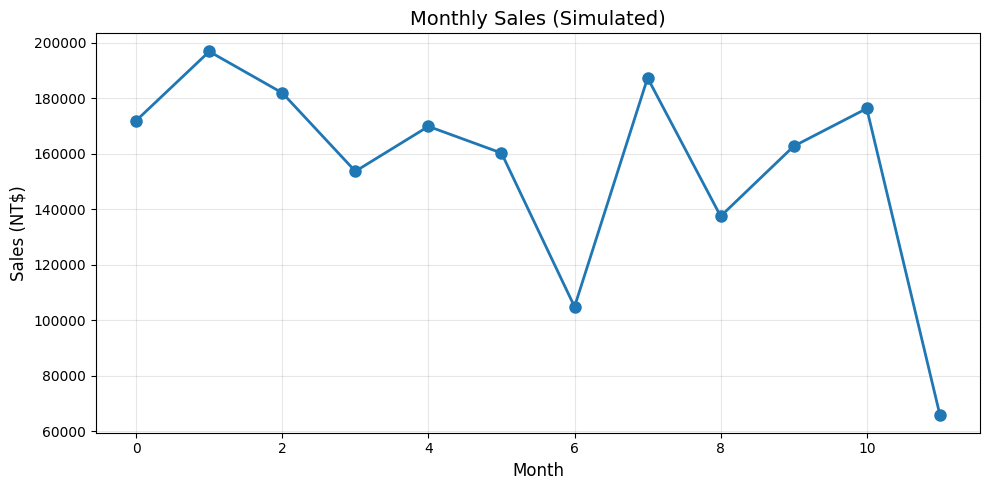


從圖表可以看出營收的波動趨勢！


In [174]:
# 使用前面建立的 sales 資料
print("月營收資料：", sales)

# 繪製折線圖
plt.figure(figsize=(10, 5))
plt.plot(sales, marker='o', linewidth=2, markersize=8)
plt.title("Monthly Sales (Simulated)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales (NT$)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n從圖表可以看出營收的波動趨勢！")

## 第 34 頁｜小專題：台股 / 美股股價資料分析（NumPy 實戰）

### 專題說明
模擬 30 天的股價 OHLCV 資料（開盤、最高、最低、收盤、成交量），使用 NumPy 進行完整分析。

### 資料欄位
- Open（開盤價）
- High（最高價）
- Low（最低價）
- Close（收盤價）
- Volume（成交量）

In [175]:
# 建立模擬股價資料（30 天 x 5 欄位）
np.random.seed(123)

# 產生基礎收盤價（100-150 之間）
base_close = np.random.uniform(100, 150, 30)

# 產生完整 OHLCV 資料
ohlcv_data = np.zeros((30, 5))
ohlcv_data[:, 3] = base_close  # Close
ohlcv_data[:, 0] = base_close + np.random.uniform(-3, 3, 30)  # Open
ohlcv_data[:, 1] = base_close + np.random.uniform(0, 5, 30)   # High
ohlcv_data[:, 2] = base_close - np.random.uniform(0, 5, 30)   # Low
ohlcv_data[:, 4] = np.random.randint(1000000, 5000000, 30)    # Volume

print("股價資料前 5 天：")
print("  Open    High     Low   Close   Volume")
print(ohlcv_data[:5])
print(f"\n資料形狀：{ohlcv_data.shape}")

股價資料前 5 天：
  Open    High     Low   Close   Volume
[[    132.3761     138.17       131.2987     134.8235 1292654.    ]
 [    113.9092     117.2366     109.3302     114.307  3613805.    ]
 [    110.9277     114.4671     109.563      111.3426 3596793.    ]
 [    127.5278     130.9392     123.753      127.5657 1336803.    ]
 [    135.5284     140.1852     133.0076     135.9734 3135570.    ]]

資料形狀：(30, 5)


In [176]:
# 步驟 1：提取收盤價和成交量
close_prices = ohlcv_data[:, 3]
volumes = ohlcv_data[:, 4]

print("收盤價：", close_prices[:10], "...")  # 顯示前 10 個
print("成交量：", volumes[:10], "...")

收盤價： [134.8235 114.307  111.3426 127.5657 135.9734 121.1553 149.0382 134.2415
 124.0466 119.6059] ...
成交量： [1292654. 3613805. 3596793. 1336803. 3135570. 4484123. 3056878. 1405430.
 3337271. 1998353.] ...


In [177]:
# 步驟 2：計算基本統計
avg_close = close_prices.mean()
max_close = close_prices.max()
min_close = close_prices.min()

print(f"平均收盤價：{avg_close:.2f}")
print(f"最高收盤價：{max_close:.2f}")
print(f"最低收盤價：{min_close:.2f}")

平均收盤價：124.92
最高收盤價：149.04
最低收盤價：102.98


In [136]:
# 步驟 3：找出最佳 / 最差交易日
best_day = np.argmax(close_prices)
worst_day = np.argmin(close_prices)

print(f"最佳交易日：第 {best_day + 1} 天，收盤價 {close_prices[best_day]:.2f}")
print(f"最差交易日：第 {worst_day + 1} 天，收盤價 {close_prices[worst_day]:.2f}")

最佳交易日：第 7 天，收盤價 149.04
最差交易日：第 14 天，收盤價 102.98


In [137]:
# 步驟 4：計算每日報酬率（向量化切片）
# 公式：(今日收盤 - 昨日收盤) / 昨日收盤
daily_returns = (close_prices[1:] - close_prices[:-1]) / close_prices[:-1]

print(f"每日報酬率（前 10 天）：{daily_returns[:10]}")
print(f"平均日報酬率：{daily_returns.mean():.4f}")
print(f"最大日報酬率：{daily_returns.max():.4f}")
print(f"最小日報酬率：{daily_returns.min():.4f}")

每日報酬率（前 10 天）：[-0.1522 -0.0259  0.1457  0.0659 -0.109   0.2301 -0.0993 -0.0759 -0.0358
 -0.0205]
平均日報酬率：0.0055
最大日報酬率：0.2301
最小日報酬率：-0.2029


In [138]:
# 步驟 5：識別高波動日（使用 std 和 where）
returns_std = daily_returns.std()
high_volatility = np.where(np.abs(daily_returns) > returns_std, "高波動", "正常")

print(f"報酬率標準差：{returns_std:.4f}")
print(f"高波動天數：{(high_volatility == '高波動').sum()} / {len(high_volatility)}")
print(f"\n前 10 天波動狀態：{high_volatility[:10]}")

報酬率標準差：0.1129
高波動天數：11 / 29

前 10 天波動狀態：['高波動' '正常' '高波動' '正常' '正常' '高波動' '正常' '正常' '正常' '正常']


### 小試身手（專題任務）

使用上面的 `ohlcv_data` 完成以下任務：

1. **計算平均成交量**
2. **找出收盤價高於平均的天數**
3. **計算最大單日報酬率是多少**
4. **找出成交量最大的那一天是第幾天**

### 解題提示（老師用）
- 平均成交量：`volumes.mean()`
- 高於平均天數：`(close_prices > avg_close).sum()`
- 最大報酬：`daily_returns.max()`
- 最大量日：`np.argmax(volumes) + 1`（+1 因為從 1 開始算）

In [180]:
# 參考解法

# 1. 平均成交量
avg_volume = volumes.mean()
print(f"平均成交量：{avg_volume:.0f}")

# 2. 高於平均收盤價的天數
above_avg_days = (close_prices > avg_close).sum()
print(f"高於平均收盤價天數：{above_avg_days} / {len(close_prices)}")

# 3. 最大單日報酬率
max_return = daily_returns.max()
print(f"最大單日報酬率：{max_return:.4f} ({max_return*100:.2f}%)")

# 4. 最大成交量的日期
max_volume_day = np.argmax(volumes) + 1
print(f"最大成交量日：第 {max_volume_day} 天，成交量 {volumes.max():.0f}")


平均成交量：2754983
高於平均收盤價天數：15 / 30
最大單日報酬率：0.2301 (23.01%)
最大成交量日：第 21 天，成交量 4920314


## 第 35 頁｜總結與下一步

### 今天學到的核心概念

#### 1. ndarray 心智模型
- 連續記憶體、型別一致、高效運算
- shape、dtype、ndim 三個關鍵屬性

#### 2. slicing & mask
- 索引、切片、布林遮罩篩選資料
- 多條件篩選（&、|、~）

#### 3. vectorization & broadcasting
- 向量化：不用 for-loop 的運算
- 廣播：自動擴展維度進行運算

#### 4. aggregation & NaN
- mean、sum、std 與 axis 的關係
- 處理缺失值：nanmean、isnan

#### 5. sorting & binning
- sort vs argsort（值 vs 索引）
- digitize 分箱、unique 計數

#### 6. dot product
- @ 運算子做矩陣乘法
- 應用於加權計算

---

### 為什麼 NumPy 對資料分析這麼重要？

1. **Pandas 的基礎**：DataFrame 底層就是 NumPy
2. **機器學習必備**：sklearn、TensorFlow、PyTorch 都基於 NumPy
3. **金融分析**：股價、報酬率、風險計算都用 NumPy
4. **科學計算**：物理、生物、統計領域的標準工具

---

### 下一步建議

#### 進階 NumPy
- 進階索引（fancy indexing）
- 結構化陣列（structured arrays）
- 記憶體管理與效能優化

#### 結合 Pandas
- 用 NumPy 做複雜計算，再轉回 DataFrame
- pandas datetime index 處理時間序列
- rolling window（移動平均）

#### 實戰專題
- 股價技術指標（MA、MACD、RSI）
- 波動率分析（歷史波動、隱含波動）
- 投資組合優化（風險報酬分析）

#### 視覺化
- matplotlib 進階繪圖（subplot、雙軸圖）
- 蠟燭圖（candlestick chart）
- 互動式圖表（plotly）

#### 機器學習前置
- sklearn preprocessing（標準化、正規化）
- 特徵工程（feature engineering）
- 資料分割（train-test split）

